In [1]:
import pandas as pd 
import numpy as np

In [54]:
pd.set_option("max_colwidth", 150) 
f = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx" 
df = pd.read_excel(f) 
basket = (df[df["Country"] == "United Kingdom"] 
          .groupby(["InvoiceNo", "Description"])["Quantity"] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index("InvoiceNo")) 
basket_sets = basket.applymap(lambda x: 1 if x >=1 else 0)

In [55]:
basket_sets.head()

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from mlxtend.frequent_patterns import apriori

In [57]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
one_itemsets = frequent_itemsets[frequent_itemsets['length'] == 1]
two_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]

In [58]:
one_itemsets.sort_values(by='support', ascending=False).head()

# the top5 1-itemsets with the highest support are 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
# 'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT'.

# the highest support value for the 1-itemsets is 0.098276.

,support,itemsets,length
188,0.098276,[WHITE HANGING HEART T-LIGHT HOLDER],1
75,0.087931,[JUMBO BAG RED RETROSPOT],1
148,0.076452,[REGENCY CAKESTAND 3 TIER],1
121,0.072323,[PARTY BUNTING],1
99,0.063158,[LUNCH BAG RED RETROSPOT],1


In [59]:
two_itemsets.sort_values(by='support', ascending=False).head()

# the top5 2-itemsets with the highest support are 'JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT', 
# 'GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER', 'JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI',
# 'JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAGE RED PAISLEY', 'LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT'.

# the highest support value for the 1-itemsets is 0.035617.

,support,itemsets,length
211,0.035617,"[JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT]",2
207,0.031806,"[GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ]",2
218,0.031670,"[JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI]",2
217,0.029809,"[JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAGE RED PAISLEY]",2
223,0.027541,"[LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT]",2


In [2]:
from mlxtend.frequent_patterns import association_rules

In [61]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7).sort_values(by='confidence', ascending=False).head()

# the top5 assciation rules are 'ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER' --> 'GREEN REGENCY TEACUP AND SAUCER'
#                               'PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER' --> 'ROSES REGENCY TEACUP AND SAUCER'
#                               'PINK REGENCY TEACUP AND SAUCER' --> 'GREEN REGENCY TEACUP AND SAUCER'
#                               'PINK REGENCY TEACUP AND SAUCER' --> 'ROSES REGENCY TEACUP AND SAUCER'
#                               'GREEN REGENCY TEACUP AND SAUCER' --> 'ROSES REGENCY TEACUP AND SAUCER'

# After I searched online, I found 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER' and 'ROSES REGENCY TEACUP AND SAUCER'
# are the same type of things, the only difference among them is the color. So they are very likely to be bought together.

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.024773,0.042377,0.022368,0.902930,21.306837,0.021319,9.865319
8,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.026180,0.043421,0.022368,0.854419,19.677538,0.021232,6.570786
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031897,0.042377,0.026180,0.820768,19.368019,0.024828,5.342926
5,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.031897,0.043421,0.024773,0.776671,17.886978,0.023388,4.283280
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527


In [3]:
url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df2 = pd.read_csv(url2, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

In [4]:
df2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
df_cluster = df2[['Petal Length', 'Petal Width']]
agglomerative_clustering.fit(df_cluster)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x000001A7EA22F048>)

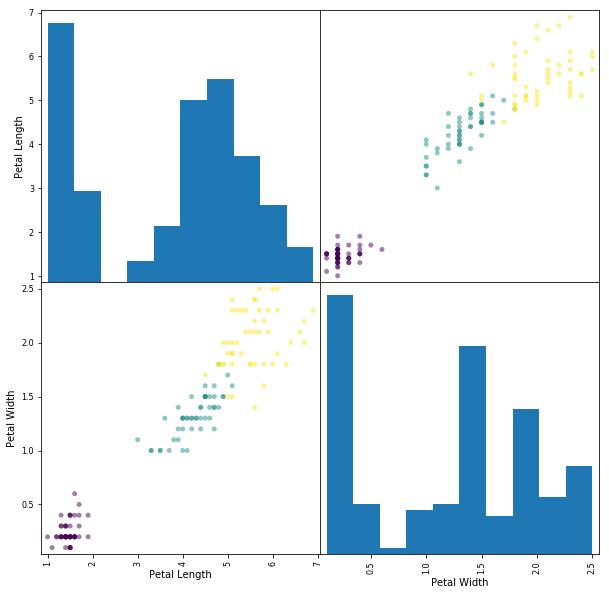

In [15]:
colors = pd.factorize(df2['Name'])[0]
scatter_plot = pd.plotting.scatter_matrix(df_cluster, figsize=(10, 10), c=colors, s=100)

In [11]:
cluster_labels = agglomerative_clustering.labels_
cluster_labels = np.where(cluster_labels == 2, "Iris-setosa", cluster_labels)
cluster_labels = np.where(cluster_labels == '1', "Iris-versicolor", cluster_labels)
cluster_labels = np.where(cluster_labels == '0', "Iris-virginica", cluster_labels)

actual_labels = df2['Name']
pd.crosstab(actual_labels, cluster_labels, rownames=['actual_labels'], colnames=['cluster_labels'])

# 6 instances appear to belong to an incorrect cluster
# "Iris-setosa" correspond perfectly to its class label

cluster_labels,Iris-setosa,Iris-versicolor,Iris-virginica
actual_labels,,,
Iris-setosa,50,0,0
Iris-versicolor,0,45,5
Iris-virginica,0,1,49


In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

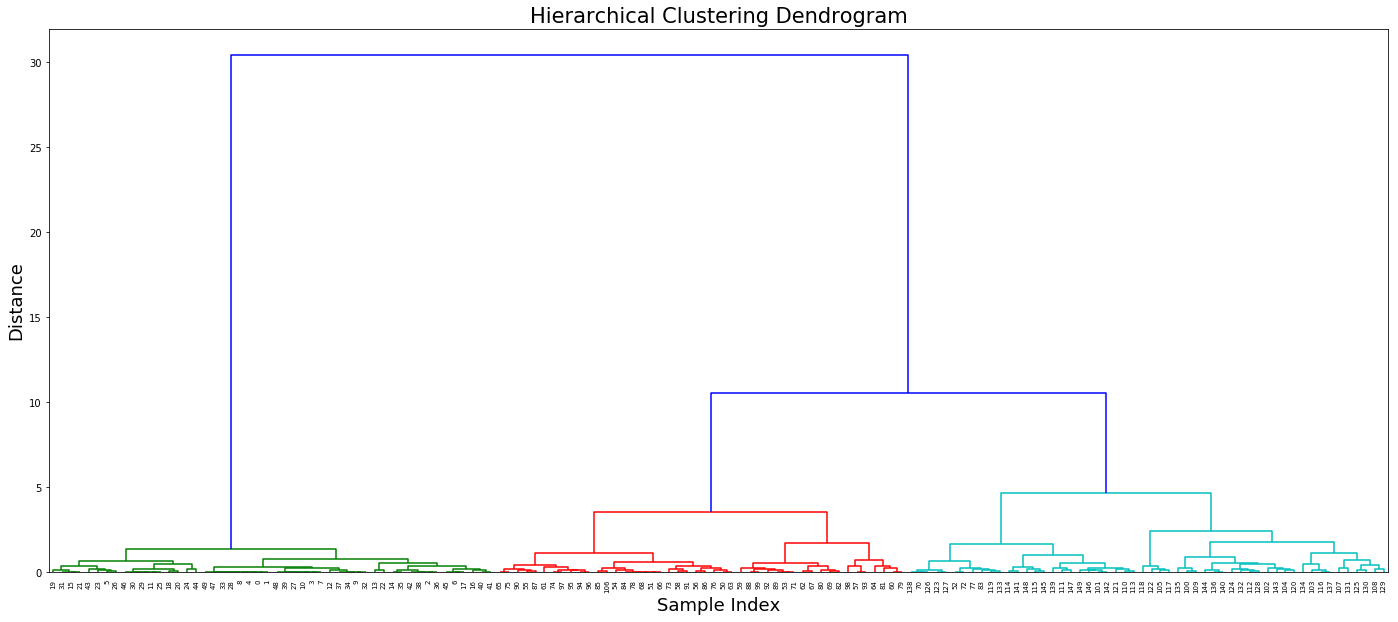

In [14]:
linkage_matrix = linkage(df2[["Petal Length", "Petal Width"]], "ward")
figure = plt.figure(figsize=(24, 10))
dendrogram(linkage_matrix, color_threshold=10, leaf_font_size=7., leaf_rotation=90.)
plt.title("Hierarchical Clustering Dendrogram", fontsize=21)
plt.xlabel("Sample Index", fontsize=18)
plt.ylabel("Distance", fontsize=18)
plt.show()

In [ ]:
# Yes, there is correspondence with dendrogram, scatter plot and cross-tabulation.

# The data points in the scatter plot above form three distinct groups based on the distance among each other.

# a cross-tabulation is a two-dimensional table that records the frequency of respondents that have the specific 
# characteristics described in the cells of the table.

# The dendrogram is a visual representation of the compound correlation data. 
# The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. 
# Compound clusters are formed by joining individual compounds or existing compound clusters with the 
# join point referred to as a node. This can be seen in the diagram above. 
# At each dendrogram node we have a right and left sub-branch of clustered compounds. 
# Based on the distance metric carculation, highly correlated clusters are nearer the bottom of the dendrogram.
# As we move up the dendrogram, the compound clusters get bigger and the distance between compound clusters increases in value.
# From the dendrogram above, we can clearly see the three clusters which represent the three class in the dataset.

# At the first step in dendrogram, two nearest sample points merge into a new node, which corresponds to the process in
# scatter plot where group two data points as the same cluster. 
# By iteratively implementing this process, the total number of nodes at the current level in the dendrogram decreases to 
# the number of classes int the dataset, and meanwhile the scatter plot groups all the data points into three clusters.
# The cross-tabulation shows the difference between the actual clusters and the clusters generated by dendrogram or scatter plot.
# The difference usually occurs at the margin of two clusters, where distances of the data points are very close to each other.